### The CIFAR-10 Dataset
* Contains 10 categories of images
 * airplane
 * automobile
 * bird
 * cat
 * deer
 * dog
 * frog
 * horse
 * ship
 * truck

<br>

<br>

## Training model for CIFAR-10 using a deep convlotional neural network

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

In [12]:
BATCH_SIZE = 32
NUM_CLASSES = 10
EPOCHS = 10

# Loads the CIFAR dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Display our data shape/dimensions
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Format our training data by Normalizing and changing data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Now we one hot encode outputs
y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

model = tf.keras.models.Sequential()
# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=(3, 3), 
                                 padding='same', 
                                 strides=(1,1),
                                 kernel_initializer='glorot_uniform',
                                 input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=NUM_CLASSES))
model.add(tf.keras.layers.Activation('softmax'))

# initiate RMSprop optimizer and configure some parameters
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's create our model
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

print(model.summary())

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_28 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 15, 15, 32)        0         
_______________________________________________


<br>

<br>

### Visualizing the model 

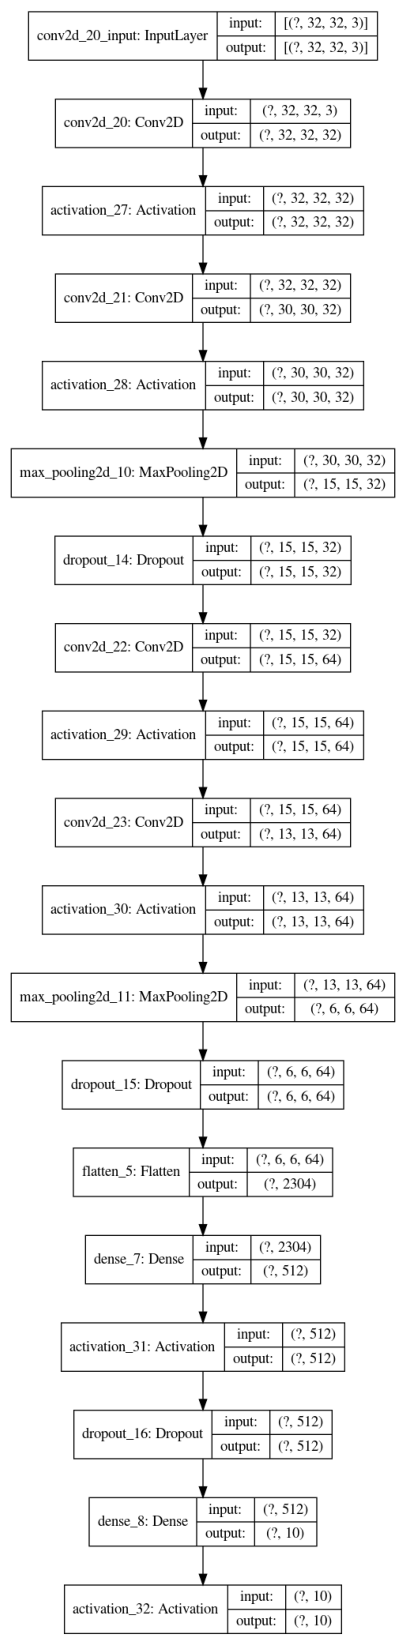

In [31]:
from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

# Save our model diagrams to this path
model_diagrams_path = '../Trained Models/'

# Generate the plot
plot_model(model, 
           to_file = model_diagrams_path + 'model_plot_cifar_iman.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread(model_diagrams_path + 'model_plot_cifar_iman.png')
plt.figure(figsize=(10,30))
plt.axis('off')
imgplot = plt.imshow(img) 

<br>

<br>

### Training

In [13]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    shuffle=True)

model.save("../Trained Models/cifar_simple_cnn_2_iman.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 80s 2ms/sample - loss: 1.8544 - accuracy: 0.3220 - val_loss: 1.5521 - val_accuracy: 0.4310
Epoch 2/10
45000/45000 [==============================] - 83s 2ms/sample - loss: 1.5114 - accuracy: 0.4503 - val_loss: 1.3653 - val_accuracy: 0.5100
Epoch 3/10
45000/45000 [==============================] - 83s 2ms/sample - loss: 1.3729 - accuracy: 0.5048 - val_loss: 1.2589 - val_accuracy: 0.5574
Epoch 4/10
45000/45000 [==============================] - 83s 2ms/sample - loss: 1.2793 - accuracy: 0.5434 - val_loss: 1.1935 - val_accuracy: 0.5796
Epoch 5/10
45000/45000 [==============================] - 84s 2ms/sample - loss: 1.2021 - accuracy: 0.5722 - val_loss: 1.2249 - val_accuracy: 0.5774
Epoch 6/10
45000/45000 [==============================] - 92s 2ms/sample - loss: 1.1374 - accuracy: 0.5982 - val_loss: 1.0704 - val_accuracy: 0.6186
Epoch 7/10
45000/45000 [==============================] -

<br>

<br>

## Plotting the accuracy and loss charts

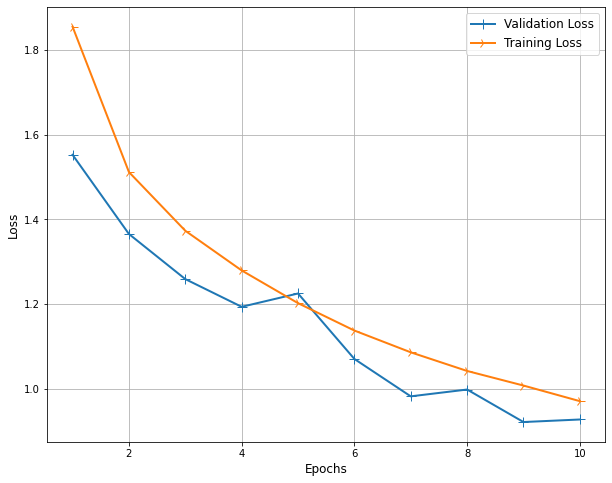

In [17]:
# Plotting our loss charts
plt.figure(figsize=(10,8))

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs', fontsize='12') 
plt.ylabel('Loss', fontsize='12')
plt.grid(True)
plt.legend(loc='best', fontsize='12')
plt.show()

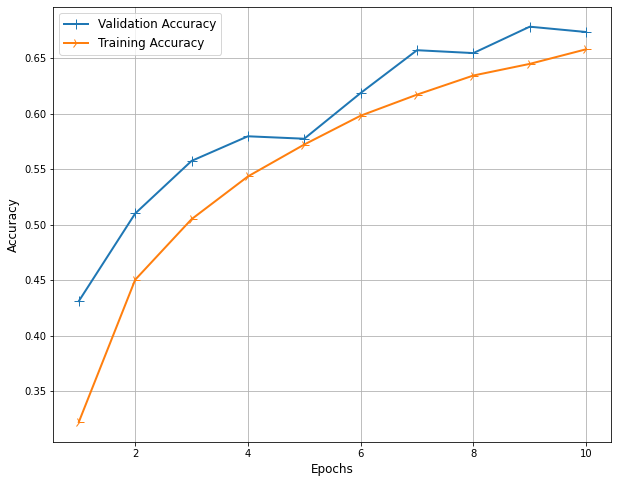

In [19]:
# Plotting our accuracy charts
plt.figure(figsize=(10,8))

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs', fontsize=12) 
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

<br>

<br>

## Running some tests

we are loading the mdoel that we have already trained and saved in the previous cell

In [20]:
img_row, img_height, img_depth = 32,32,3
classifier = tf.keras.models.load_model('../Trained Models/cifar_simple_cnn_2_iman.h5')
color = True 
scale = 8

def draw_test(name, res, input_im, scale, img_row, img_height):
    BLACK = [0,0,0]
    res = int(res)
    if res == 0:
        pred = "airplane"
    if res == 1:
        pred = "automobile"
    if res == 2:
        pred = "bird"
    if res == 3:
        pred = "cat"
    if res == 4:
        pred = "deer"
    if res == 5:
        pred = "dog"
    if res == 6:
        pred = "frog"
    if res == 7:
        pred = "horse"
    if res == 8:
        pred = "ship"
    if res == 9:
        pred = "truck"
        
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    if color == False:
        expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (300, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL,3, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=scale, fy=scale, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,img_row, img_height, img_depth) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
              
    draw_test("Prediction", res, imageL, scale, img_row, img_height) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

<br>

<br>

---